In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Importar el documento soporte de la carpeta source
from source import soporte as sp

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

**Ejercicio**

**Fase 1**: Exploración y Limpieza

1) **Exploración Inicial:**

*Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

*Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

*Une los dos conjuntos de datos de la forma más eficiente.

In [2]:
# Importar los dos dataframes para poder abrirlos y trabajar sobre ellos

df_flight = pd.read_csv("data/Customer Flight Activity.csv")

df_history = pd.read_csv("data/Customer Loyalty History.csv")

In [3]:
# Conocer los datos de los dataframe

df_flight.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_history.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
# Saber el tamaño de los dataframes

print(f"El número de filas que tenemos para el dataframe de flight analysis {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

print(f"El número de filas que tenemos para el dataframe de loyalty history es {df_history.shape[0]}, y el número de columnas es {df_history.shape[1]}")


El número de filas que tenemos para el dataframe de flight analysis 405624, y el número de columnas es 10
El número de filas que tenemos para el dataframe de loyalty history es 16737, y el número de columnas es 16


In [6]:
# Columnas de los dataframes 

print(f"Los nombres de las columnas del dataframe de flight analysis son: \n {df_flight.columns}")
print('---------------------------------------------------------------------------------------------------')
print(f"Los nombres de las columnas del dataframe de loyalty history son: \n {df_history.columns}")

Los nombres de las columnas del dataframe de flight analysis son: 
 Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
---------------------------------------------------------------------------------------------------
Los nombres de las columnas del dataframe de loyalty history son: 
 Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


In [7]:
# Verificar el tipo de columnas que hay

df_flight.info()

# de esta tabla, podemos concluir que todas las columnas son numericas (o int o float), y que no tenemos ningún nulo en sus celdas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
df_history.info()

# Para esta tabla podemos concluir que hay columnas numericas y categoricas y tenemos nulos en tres columnas: Salary, Cancellation Year, Cancellation Month               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [9]:
# Verificar los duplicados de los dataframes

print(f"Los duplicados para el dataframe de flight analysis es de: {df_flight.duplicated().sum()}")

print(f"Los duplicados para el dataframe de loyalty history es de: {df_history.duplicated().sum()}")

Los duplicados para el dataframe de flight analysis es de: 1864
Los duplicados para el dataframe de loyalty history es de: 0


In [10]:
# Hay duplicados en la primera tabla, por esto tenemos que evaluar mejor estos duplicados, para saber si podemos borrarlos o no del dataframe.

dupli = df_flight[df_flight.duplicated(keep=False)]

dupli

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [11]:
# Eliminar estas filas duplicadas y mantener la última ocurrencia

df_flight_sin_duplicados = df_flight.drop_duplicates(keep='last')

df_flight_sin_duplicados.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [12]:
# Verificación después de eliminar los duplicados

print("Número de filas originales:", len(df_flight))
print("Número de filas después de eliminar duplicados:", len(df_flight_sin_duplicados))

Número de filas originales: 405624
Número de filas después de eliminar duplicados: 403760


In [13]:
# hacer un describe para entender mejor las variables numericas de los dataframes

df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [14]:
# sacamos la misma info para la tabla sin los duplicados para poder ver si hay diferencias

df_flight_sin_duplicados.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [15]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [16]:
# hacemos el mismo metodo, pero para las columnas categoricas del datafram loyalty history, ya que el otro no tiene columnas categoricas

df_history.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [17]:
# Muestra los principales estadísticos para las columnas categoricas del dataframe loyalty history

df_history_categorica = df_history.select_dtypes(include="object")

# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas utilizando el método '.columns'
columnas_cat = df_history_categorica.columns
print(f"Las columnas del DataFrame de variables categóricas son: \n {columnas_cat}")

# empezamos a iterar por cada una de las columnas para sacar principales estadisticos
for columna in columnas_cat:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_history[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_history[columna].value_counts()} ")

Las columnas del DataFrame de variables categóricas son: 
 Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Country
Canada    16737
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos de las categorías son: Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland    

In [18]:
# Como hemos visto arriba que solo la segunda tabla tiene nulos, vamos a mirar el % que tenemos de nulos para cada columna

porc_nulos = (df_history.isnull().sum() / df_history.shape[0]) * 100
porc_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [19]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [107]:
# Concluciones para las columnas que tenemos nulos:

# *Cancellation Year y Cancellation Month tenemos que seguir con los nulos, ya que son datos de la gente que ha cancelado el programa de leadad.
# *La columna Salary tiene un alto valor de % de nulos, y por esto seguiremos a analizarla para saber si podemos gestionar los nulos o no. 

In [108]:
# Unir los datos de la manera más eficiente.

# No tiene sentindo unir los datos simplesmente haciendo un merge, para repetir muchas veces los datos de cada cliente. 
# Así que la mejor decisión es primero unir los datos de los clientes de la tabla de flight y así, vamos a tener solo una fila para cada cliente, con las informaciones sumadas. 
# desués sí se puede hacer un merge 

In [20]:
df_flight_sin_duplicados['Year'].unique()

array([2017, 2018])

In [21]:
df_flight_sin_duplicados[df_flight_sin_duplicados['Loyalty Number'] == 100214].sort_values(['Year','Month'])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3,100214,2017,1,0,0,0,0,0.00,0,0
16904,100214,2017,2,6,0,6,912,91.00,0,0
33805,100214,2017,3,0,0,0,0,0.00,0,0
50706,100214,2017,4,0,0,0,0,0.00,0,0
67607,100214,2017,5,0,0,0,0,0.00,0,0
101185,100214,2017,6,1,1,2,2514,251.00,459,37
101409,100214,2017,7,0,0,0,0,0.00,0,0
118310,100214,2017,8,1,1,2,3546,354.00,0,0
135211,100214,2017,9,6,0,6,1704,170.00,0,0
152112,100214,2017,10,10,0,10,1910,191.00,0,0


In [22]:
df_flight_sin_duplicados.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [23]:
df_flight_final = df_flight_sin_duplicados.groupby('Loyalty Number', as_index=False)[['Flights Booked', 'Flights with Companions',
                                                                                      'Total Flights','Distance','Points Accumulated',
                                                                                      'Points Redeemed','Dollar Cost Points Redeemed']].sum()

In [24]:
df_flight_final

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,157,35,192,50682,5376.00,1513,123
1,100102,173,42,215,40222,4115.25,1195,96
2,100140,152,38,190,41252,4184.25,593,48
3,100214,79,17,96,33982,3426.00,861,70
4,100272,127,36,163,40872,4108.04,1007,82
...,...,...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50,876,71
16733,999911,0,0,0,0,0.00,0,0
16734,999940,63,23,86,23410,2415.00,672,54
16735,999982,22,2,24,5948,594.00,0,0


In [25]:
# Verificar si hay diferencia entre los Loyalty number entre las dos tablas

# Crear variables con los valores unicos que tienen las columnas

loyalty_id_hist = df_history['Loyalty Number'].unique()
loyalty_id_flight = df_flight_final['Loyalty Number'].unique()

In [26]:
# Diferencia entre set para saber si algo esta de 'fuera' de la intersección

dif_loyalty_id = set(loyalty_id_flight).difference(set(loyalty_id_hist))
dif_loyalty_id

set()

In [27]:
# Diferencia entre set para saber si algo esta de 'fuera' de la intersección

dif_loyalty_id2 = set(loyalty_id_hist).difference(set(loyalty_id_flight))
dif_loyalty_id2

set()

In [28]:
df_final = pd.merge(df_history, df_flight_final, on='Loyalty Number', how='left')

In [29]:
df_final.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,132,39,171,51877,5224.44,1418,115
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,190,25,215,41578,4176.04,1971,159
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,66,21,87,19664,1963.00,374,30
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,123,36,159,36043,3626.68,1291,105
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,132,44,176,36840,3689.68,0,0


In [119]:
# Verificando si el index esta correcto

df_final.index

RangeIndex(start=0, stop=16737, step=1)

In [30]:
print(f"las filas y columnas que tenemos en el df_rp {df_flight_final.shape}")
print("-------------------------------------------------------------------")

print(f"las filas y columnas que tenemos en el df_in {df_history.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el inner_merge son {df_final.shape}")
print("-------------------------------------------------------------------")

las filas y columnas que tenemos en el df_rp (16737, 8)
-------------------------------------------------------------------
las filas y columnas que tenemos en el df_in (16737, 16)
-------------------------------------------------------------------
las filas y columnas que tenemos en el inner_merge son (16737, 23)
-------------------------------------------------------------------


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Country                      16737 non-null  object 
 2   Province                     16737 non-null  object 
 3   City                         16737 non-null  object 
 4   Postal Code                  16737 non-null  object 
 5   Gender                       16737 non-null  object 
 6   Education                    16737 non-null  object 
 7   Salary                       12499 non-null  float64
 8   Marital Status               16737 non-null  object 
 9   Loyalty Card                 16737 non-null  object 
 10  CLV                          16737 non-null  float64
 11  Enrollment Type              16737 non-null  object 
 12  Enrollment Year              16737 non-null  int64  
 13  Enrollment Month

2) **Limpieza de Datos:**

*Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.

*Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.

*Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [33]:
# llamar la funcion para transfomar las columnas en minusculas

df_final = sp.columnas_minusculas(df_final)
df_flight_sin_duplicados = sp.columnas_minusculas(df_flight_sin_duplicados)
df_history = sp.columnas_minusculas(df_history)

In [34]:
# Como hemos visto arriba que solo la segunda tabla tiene nulos, vamos a mirar el % que tenemos de nulos para cada columna

porc_nulos = (df_final.isnull().sum() / df_final.shape[0]) * 100
porc_nulos

loyalty number                  0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.321145
marital status                  0.000000
loyalty card                    0.000000
clv                             0.000000
enrollment type                 0.000000
enrollment year                 0.000000
enrollment month                0.000000
cancellation year              87.650117
cancellation month             87.650117
flights booked                  0.000000
flights with companions         0.000000
total flights                   0.000000
distance                        0.000000
points accumulated              0.000000
points redeemed                 0.000000
dollar cost points redeemed     0.000000
dtype: float64

In [35]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
salary,25.321145
cancellation year,87.650117
cancellation month,87.650117


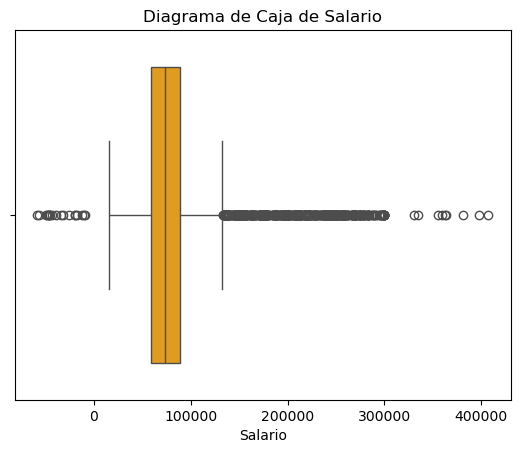

In [36]:
# Como comentado anteriomente, aquí seguiremos el analises de la columna de Salary, para gestionar sus nulos. 

# Como es una columna numerica, vamos a hacer una visualización en gráfica para saber si tiene valores outliers o no

sns.boxplot(x = 'salary',
            data = df_final,
            color='orange')

# cambiamos el nombre del eje x
plt.xlabel('Salario')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Salario');

#para guardar graficas: 

plt.savefig("imagenes/boxplot_salario.jpg", bbox_inches = "tight", pad_inches=0)


In [43]:
# esta columna de Salary tiene muchos valores atípicos (positivos y negativos) por lo que optaremos por reemplazar los nulos con métodos más avanzados como
# KNNImputer y IterativeImputer. Para comparar aplicaremos los dos métodos a la columna y veremos si hay diferencias o no, para elegir el que mejor si encaje

In [39]:
df = df_final[(df_final['salary'] < 0)]
df.head(2)

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.5,2018 Promotion,2018,3,NaN,NaN,58,15,73,16460,1650.84,814,66
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.0,2018 Promotion,2018,3,NaN,NaN,72,16,88,15974,1691.00,587,47


In [38]:
# Media y mediana para los sueldos negativos
df['salary'].agg(['mean','median'])

mean     -35538.25
median   -41368.50
Name: salary, dtype: float64

In [40]:
df.shape

(20, 23)

In [41]:
df_sueldo_posi = df_final[(df_final['salary'] > 0)]

# Media y mediana para los sueldos positivos
df_sueldo_posi['salary'].agg(['mean','median'])

mean      79429.572642
median    73510.000000
Name: salary, dtype: float64

In [42]:
df_sueldo_posi.head(10)

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,132,39,171,51877,5224.44,1418,115
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,132,44,176,36840,3689.68,0,0
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,292,54,346,83996,8464.16,1222,99
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN,144,41,185,41278,4177.92,733,59
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN,91,33,124,34878,3529.04,1516,123
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN,149,45,194,33622,3413.24,1683,137
10,932823,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,66444.0,Married,Star,3863.31,Standard,2015,3,NaN,NaN,167,38,205,43277,4349.24,499,40
11,144514,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,49618.0,Married,Star,3864.78,Standard,2016,6,NaN,NaN,114,38,152,37760,3817.36,1599,130
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,86,22,108,25268,2572.84,436,35
15,205785,Canada,Ontario,Toronto,M2M 6J7,Male,Master,128118.0,Married,Star,3873.65,Standard,2016,8,NaN,NaN,117,40,157,36218,3644.68,1233,100


In [43]:
# Nivel educacional de las personas que tienen el sueldo negativo

df['education'].unique()

array(['High School or Below', 'Bachelor'], dtype=object)

In [44]:
# Porcentaje de valores negativos de la columna 'salary'

num_ne = (df_final['salary'] < 0).sum()
total_filas = df_final.shape[0]

por_neg = (num_ne/total_filas) *100
print(f"Porcentaje de números negativos en la columna 'salary': {por_neg}%")


Porcentaje de números negativos en la columna 'salary': 0.119495728027723%


In [45]:
# Como hay solo 0.12% de valores negativos en la columna de 'salary', la decision va a ser que estos valores los pasaremos a positivo, ya que no podemos tener sueldos negativos. 
# Solo afecta 20 filas de nuestro dataframe 


In [46]:
# Transformar los valores negativos en positivos en la columna 'salary'
df_final = sp.transformar_negativos_en_positivos(df_final, 'salary')

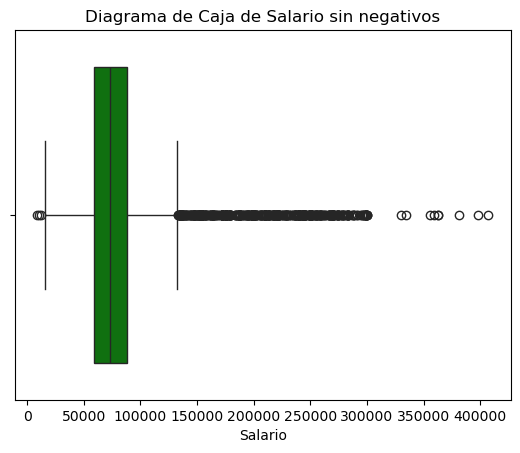

In [47]:
# Boxplot para la columan salary sin los negativos

sns.boxplot(x = 'salary',
            data = df_final,
            color='green')

# cambiamos el nombre del eje x
plt.xlabel('Salario')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Salario sin negativos');

#para guardar graficas: 

plt.savefig("imagenes/boxplot_salario_sin_negativos.jpg", bbox_inches = "tight", pad_inches=0)

In [48]:
df_nan_salary = df_final[pd.isna(df_final['salary'])]
df_nan_salary

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,190,25,215,41578,4176.04,1971,159
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,66,21,87,19664,1963.00,374,30
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,123,36,159,36043,3626.68,1291,105
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN,143,25,168,48292,4880.80,1583,128
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Single,Star,3871.07,Standard,2013,10,NaN,NaN,204,62,266,55956,5643.96,1190,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN,30,11,41,11900,1188.00,507,41
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN,132,27,159,37190,3754.60,328,27
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN,106,22,128,34126,3448.52,341,28
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN,126,13,139,40743,4070.00,0,0


In [49]:
df_nan_salary['education'].unique()

array(['College'], dtype=object)

In [57]:
# Todos los valores NaN de la columna 'Salary', son del nivel educacional 'College'. O sea, todos los que son College, no tenemos la info del sueldo que reciben.
# Así que haremos la imputación de estos nulos 

In [50]:
# aplicaremos los dos métodos para luego compararlos, empezaremos por el IterativeImputer

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_final[["salary"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[83236.        ],
       [79359.34090727],
       [79359.34090727],
       ...,
       [79359.34090727],
       [57297.        ],
       [75049.        ]])

In [51]:
# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear columnas nuevas
df_final[["salary_iterative"]] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_final[['salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
salary_iterative    0
dtype: int64 nulos


In [52]:

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_final[["salary"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[83236.        ],
       [79359.34090727],
       [79359.34090727],
       ...,
       [79359.34090727],
       [57297.        ],
       [75049.        ]])

In [53]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_final[["salary_knn"]] = imputer_knn_imputado


# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_final[['salary_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
salary_knn    0
dtype: int64 nulos


In [54]:
# Comprobar y comparar los dos metodos utilizados para elegir lo que mejor se encaja

df_final.describe()[["salary","salary_iterative", "salary_knn"]]

,salary,salary_iterative,salary_knn
count,12499.000000,16737.000000,16737.000000
mean,79359.340907,79359.340907,79359.340907
std,34749.691464,30029.311812,30029.311812
min,9081.000000,9081.000000,9081.000000
25%,59246.500000,63899.000000,63899.000000
50%,73455.000000,79359.340907,79359.340907
75%,88517.500000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [ ]:
# Podemos ver que los dos metodos de imputación nos devuelve resultados iguales, así que nos quedaremos con el metodo iterative y borraremos las demas columnas del dataframe 

In [55]:
df_final = df_final.drop(['salary', 'salary_knn'], axis=1)

In [56]:
# arreglar el nombre de la columna salary 

df_final = df_final.rename(columns={'salary_iterative': 'salary'})

In [57]:
# redondear a dos digitos la columna salary 

df_final['salary'] = df_final['salary'].round(2)

In [58]:
# Llamar a la funcion de transformar tipo de dato
df_final = sp.transformar_ano_en_fecha(df_final, 'cancellation year')


In [ ]:
# Llamar la función para transformar el tipo de dato de la columna cancellation month
df_final['cancellation month'] = df_final['cancellation month'].apply(sp.float_a_int).astype('Int64')


In [60]:
# Verificar si ha cambiado el tipo de la columna
df_final['cancellation month'].dtype

Int64Dtype()

In [61]:
df_final.head()

,loyalty number,country,province,city,postal code,gender,education,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,salary
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,1900,<NA>,132,39,171,51877,5224.44,1418,115,83236.00
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,3839.61,Standard,2016,3,1900,<NA>,190,25,215,41578,4176.04,1971,159,79359.34
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,3839.75,Standard,2014,7,2018,1,66,21,87,19664,1963.00,374,30,79359.34
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,3839.75,Standard,2013,2,1900,<NA>,123,36,159,36043,3626.68,1291,105,79359.34
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,3842.79,Standard,2014,10,1900,<NA>,132,44,176,36840,3689.68,0,0,103495.00


In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty number               16737 non-null  int64  
 1   country                      16737 non-null  object 
 2   province                     16737 non-null  object 
 3   city                         16737 non-null  object 
 4   postal code                  16737 non-null  object 
 5   gender                       16737 non-null  object 
 6   education                    16737 non-null  object 
 7   marital status               16737 non-null  object 
 8   loyalty card                 16737 non-null  object 
 9   clv                          16737 non-null  float64
 10  enrollment type              16737 non-null  object 
 11  enrollment year              16737 non-null  int64  
 12  enrollment month             16737 non-null  int64  
 13  cancellation yea

In [63]:
# Guardar los tres nuevos dataframes para futuras consultas 
# usar index=False te permite crear un archivo CSV más limpio y con los datos que realmente te interesan, sin agregar la columna de índice innecesaria

df_final.to_csv("data/df_final.csv", index=False)
df_flight_sin_duplicados.to_csv("data/df_flight_sin_duplicados.csv", index=False)
df_history.to_csv("data/df_history.csv", index=False)

**Fase 2: Visualización**

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1) ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [64]:
# aqui trabajaremos con el dataframe de flight_sin_duplicados

# Primero creamos una nueva columna para tener el año y el mes agrupados 
df_year_month = df_flight_sin_duplicados.groupby(['year','month'])['flights booked'].sum().reset_index()
df_year_month

,year,month,flights booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


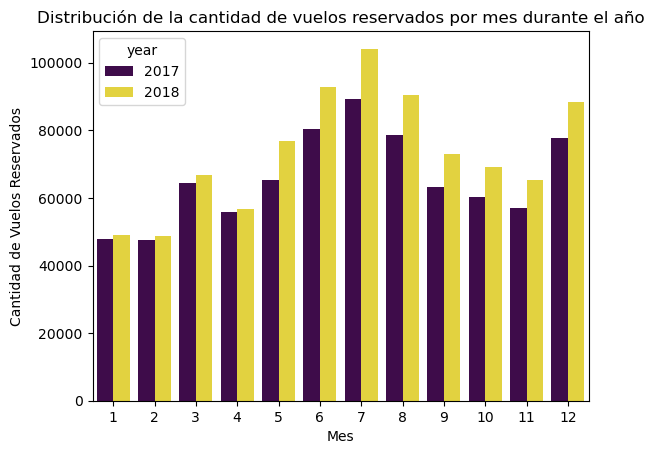

In [65]:
# Gráfica para visualizar

sns.barplot(data=df_year_month,
            x='month',
            y='flights booked',
            hue='year',
            palette='viridis')
plt.title('Distribución de la cantidad de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')

#para guardar graficas: 

plt.savefig("imagenes/cantidad_vuelo_mes_ano.jpg", bbox_inches = "tight", pad_inches=0);

2) ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [66]:
df_final.head(2)

,loyalty number,country,province,city,postal code,gender,education,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,salary
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,1900,<NA>,132,39,171,51877,5224.44,1418,115,83236.00
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,3839.61,Standard,2016,3,1900,<NA>,190,25,215,41578,4176.04,1971,159,79359.34


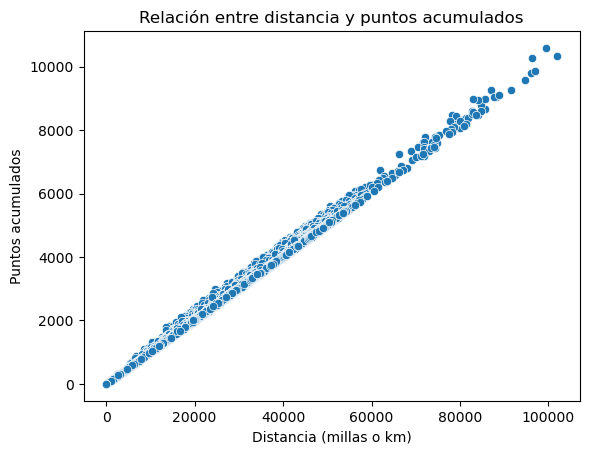

In [67]:
# Primero podemos analisar estas dos columnas en un scatter plot y ver si algo visible nos aparece

sns.scatterplot(x='distance',
                y='points accumulated',
                data=df_final)
plt.title('Relación entre distancia y puntos acumulados')
plt.xlabel('Distancia (millas o km)')
plt.ylabel('Puntos acumulados')

#para guardar graficas: 

plt.savefig("imagenes/relacion_distancia_puntos.jpg", bbox_inches = "tight", pad_inches=0);

In [ ]:
# Podemos ver una linea clar de correlación entre estas dos variables. Y además podemos decir que es una correlación positiva, o sea, cuanto más distancia más puntos tendrá el cliente

In [68]:
# Pero aún podemos calcular la correlacion de Pearson para asegurarnos que existe relación
# Podemos ver que el resultado es muy cerca de 1, lo que indica una altisima correlación entre estas dos variables. 

# Calcular la correlación de Pearson

correlation = df_final['distance'].corr(df_final['points accumulated'])
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.9988162876656848


3) ¿Cuál es la distribución de los clientes por provincia o estado?

In [69]:
# Contar la frecuencia de clientes por provincia

df_final['province'].value_counts()

province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

In [70]:
# Contar la frecuencia en % de clientes por provincia

df_final['province'].value_counts(normalize=True) * 100

province
Ontario                 32.287746
British Columbia        26.342833
Quebec                  19.716795
Alberta                  5.789568
Manitoba                 3.931409
New Brunswick            3.799964
Nova Scotia              3.094939
Saskatchewan             2.443688
Newfoundland             1.541495
Yukon                    0.657227
Prince Edward Island     0.394336
Name: proportion, dtype: float64

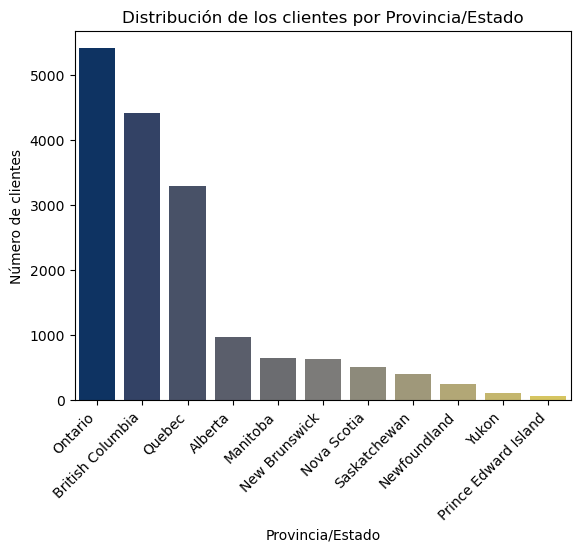

In [71]:
# O podemos visualizar en una grafica la distribuición 

sns.countplot(x='province',
              data=df_final,
              palette = 'cividis',
              order=df_final['province'].value_counts().index)

# Configurar el gráfico
plt.title('Distribución de los clientes por Provincia/Estado')
plt.xlabel('Provincia/Estado')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45, ha='right')

#para guardar graficas: 

plt.savefig("imagenes/distribuicion_clientes_provincia.jpg", bbox_inches = "tight", pad_inches=0);

4) ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [72]:
sueldo_medio_edu = df_final.groupby('education')['salary'].mean().reset_index()
sueldo_medio_edu

,education,salary
0,Bachelor,72577.254415
1,College,79359.340000
2,Doctor,178608.897820
3,High School or Below,61199.161125
4,Master,103757.848425


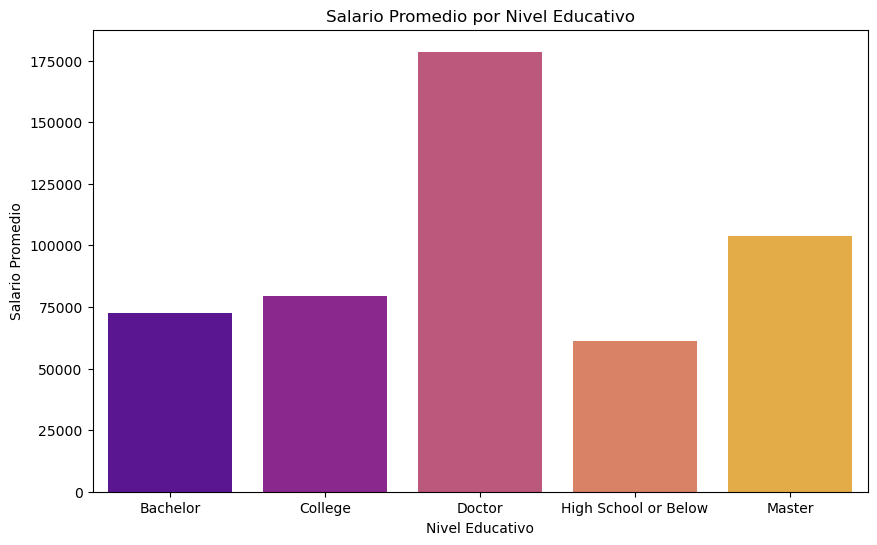

In [73]:
# mostrar una gráfica de barras para comparar los salarios promedio
plt.figure(figsize=(10, 6))
sns.barplot(data=sueldo_medio_edu,
            x='education',
            y='salary',
            palette='plasma')

# Títulos y etiquetas
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')

#para guardar graficas: 

plt.savefig("imagenes/dsalario_medio_educativo.jpg", bbox_inches = "tight", pad_inches=0);

5) ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [74]:
df_final.head()

,loyalty number,country,province,city,postal code,gender,education,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,salary
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,1900,<NA>,132,39,171,51877,5224.44,1418,115,83236.00
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,3839.61,Standard,2016,3,1900,<NA>,190,25,215,41578,4176.04,1971,159,79359.34
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,3839.75,Standard,2014,7,2018,1,66,21,87,19664,1963.00,374,30,79359.34
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,3839.75,Standard,2013,2,1900,<NA>,123,36,159,36043,3626.68,1291,105,79359.34
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,3842.79,Standard,2014,10,1900,<NA>,132,44,176,36840,3689.68,0,0,103495.00


In [75]:
# Calcular la proporción de clientes por tipo de tarjeta de fidelidad
df_prop_tarjetas = df_final.groupby("loyalty card")["loyalty number"].count().reset_index()
df_prop_tarjetas


,loyalty card,loyalty number
0,Aurora,3429
1,Nova,5671
2,Star,7637


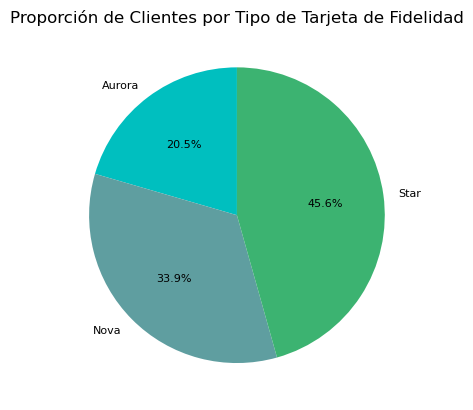

In [76]:
# Crear un pieplot para la proporción de clientes por tipo de tarjeta
colores = ["c", "cadetblue", "mediumseagreen"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie('loyalty number',
        labels= 'loyalty card',
        data = df_prop_tarjetas, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)

plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

#para guardar graficas: 

plt.savefig("imagenes/prop_clientes_tarjeta_fidelidad.jpg", bbox_inches = "tight", pad_inches=0);

6) ¿Cómo se distribuyen los clientes según su estado civil y género?

In [77]:
# Contar la cantidad de clientes por estado civil y género
# size().unstack(): Cuenta la cantidad de clientes en cada combinación de estado civil y género, y luego reorganiza los resultados para facilitar la visualización.

distribucion = df_final.groupby(['marital status', 'gender']).size().unstack()
distribucion

gender,Female,Male
marital status,,
Divorced,1269,1249
Married,4869,4866
Single,2272,2212


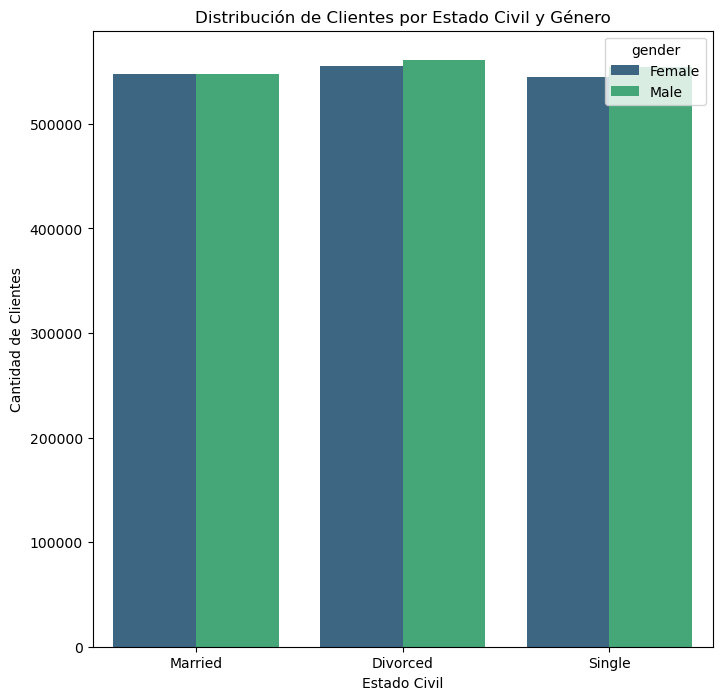

In [78]:
# Gráfica para visualizar
# ci=None: Este parámetro le dice a Seaborn que no dibuje intervalos de confianza (las líneas de error) en las barras del gráfico.

plt.figure(figsize=(8, 8))

sns.barplot(data=df_final,
            x='marital status',
            y='loyalty number',
            hue='gender',
            ci=None,            
            palette='viridis')
# Títulos y etiquetas
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')

plt.savefig("imagenes/dist_estadocivil_genero.jpg", bbox_inches = "tight", pad_inches=0);

**BONUS Fase 3:** 

Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1) Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2) Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

3) Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [79]:
# Primero paso

df_bonus = df_final[['flights booked', 'education']]
df_bonus.head()

,flights booked,education
0,132,Bachelor
1,190,College
2,66,College
3,123,College
4,132,Bachelor


In [80]:
# Segundo paso

describe = df_bonus.groupby('education')['flights booked'].describe()
describe.T

education,Bachelor,College,Doctor,High School or Below,Master
count,10475.000000,4238.000000,734.000000,782.000000,508.000000
mean,99.104821,100.613025,100.866485,101.014066,101.602362
std,54.231557,54.208810,55.933391,54.867491,54.023146
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,62.250000,58.250000,62.000000,65.000000
50%,113.000000,113.000000,115.000000,115.000000,113.000000
75%,139.000000,140.000000,143.000000,139.000000,141.000000
max,354.000000,324.000000,292.000000,265.000000,322.000000


In [81]:
# También podemos calcular el promedio y desviación estándar directamente
mean_flights = df_bonus.groupby('education')['flights booked'].mean()
std_flights = df_bonus.groupby('education')['flights booked'].std()

print(f"Promedio de vuelos reservados por nivel educativo:\n{mean_flights}")
print('---------------------------------------------------------------------------------------')
print(f"Desviación estándar de vuelos reservados por nivel educativo:\n{std_flights}")

Promedio de vuelos reservados por nivel educativo:
education
Bachelor                 99.104821
College                 100.613025
Doctor                  100.866485
High School or Below    101.014066
Master                  101.602362
Name: flights booked, dtype: float64
---------------------------------------------------------------------------------------
Desviación estándar de vuelos reservados por nivel educativo:
education
Bachelor                54.231557
College                 54.208810
Doctor                  55.933391
High School or Below    54.867491
Master                  54.023146
Name: flights booked, dtype: float64


In [82]:
# Tercero paso

# Primero encenario: Vamos agrupar toda la gente que ha ido a la universidad y así comparar con las que no han ido. 
# Hay que agrupar las personas con estudios universitarios 

# Definir los grupos
universidad = ['Bachelor', 'College', 'Doctor', 'Master']
sin_universidad = ['High Schoolor Below']

#Crear una columna 'group' para asignar el grupo a cada cliente
df_bonus['group'] = df_bonus['education'].apply(lambda x: 'University' if x in universidad else 'No University')

In [83]:
# Dividir el dataframe en dos grupos: 'University' y 'No University' para hacer el A/B testing

university_flights = df_bonus[df_bonus['group'] == 'University']['flights booked']
no_university_flights = df_bonus[df_bonus['group'] == 'No University']['flights booked']

In [84]:
# H0 -> no hay diferencia en los flights booked
# H1 -> hay diferencia en los flights booked para la gente que va a la universidad

In [85]:
# Verificar si los datos con normales
sp.normalidad(df_bonus,'flights booked')

Para la columna flights booked los datos no siguen una distribución normal.


In [86]:
# Como los datos no tienen una distribuición normal, tenemos que hacer el Mann Whitney para comprobar
# llamamos a la función
sp.test_man_whitney(df_bonus, ['flights booked'], 'No University', 'University', 'group' )

Para la métrica flights booked, las medianas son iguales.


In [ ]:
# Podemos concluir que no existen diferencias significativas en el número de vuelos reservados entre los grupos 'University' y 'No University',
# ya que el p-valor es mayor que 0.05 y no podemos rechazar el H0.

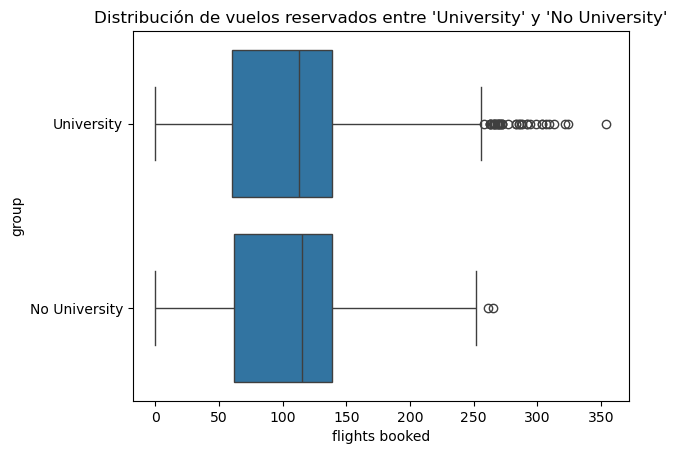

In [100]:

sns.boxplot(x='flights booked', y='group', data=df_bonus)
plt.title("Distribución de vuelos reservados entre 'University' y 'No University'");


#para guardar graficas: 

plt.savefig("imagenes/reservas_vuelos_education_university.jpg", bbox_inches = "tight", pad_inches=0);

**OTRO A/B Testing - Con grupos diferentes**

In [88]:
# Realizamos una prueba t para comparar las medias de vuelos reservados entre "Bachelor" y "College"
bachelor_flights = df_bonus[df_bonus['education'] == 'Bachelor']['flights booked']
college_flights = df_bonus[df_bonus['education'] == 'College']['flights booked']

In [89]:
# H0 -> no hay diferencia en los flights booked
# H1 -> hay diferencia en los flights booked entre los que tienen Bachelor y los que tienen College

In [90]:
sp.normalidad(df_bonus,'flights booked')

Para la columna flights booked los datos no siguen una distribución normal.


In [91]:
## llamamos a la función
sp.test_man_whitney(df_bonus, ['flights booked'], 'Bachellor', 'College', 'education' )

Para la métrica flights booked, las medianas son iguales.


In [92]:
# Podemos concluir que no existen diferencias significativas en el número de vuelos reservados entre los grupos 'Bachellor' y 'College,
# ya que el p-valor es mayor que 0.05 y no podemos rechazar el H0.

**Tercero A/B testing - Con grupos universitarios difentes**

In [ ]:
# Definir los grupos
alto_estudio = ['Bachelor', 'Doctor', 'Master']
bajo_estudio = ['High Schoolor Below', 'College']

#Crear una columna 'group' para asignar el grupo a cada cliente
df_bonus['study type'] = df_bonus['education'].apply(lambda x: 'high education' if x in alto_estudio else 'low education')

In [94]:
# Dividir el dataframe en dos grupos: 'University' y 'No University' para hacer el A/B testing

alto_estudio_flights = df_bonus[df_bonus['study type'] == 'high education']['flights booked']
bajo_estudio_flights = df_bonus[df_bonus['study type'] == 'low education']['flights booked']

In [ ]:
# H0 -> no hay diferencia en los flights booked
# H1 -> hay diferencia en los flights booked para la gente de alto y bajo estudios

In [95]:
# Verificar si los datos con normales
sp.normalidad(df_bonus,'flights booked')

Para la columna flights booked los datos no siguen una distribución normal.


In [96]:
# Como los datos no tienen una distribuición normal, tenemos que hacer el Mann Whitney para comprobar
# llamamos a la función
sp.test_man_whitney(df_bonus, ['flights booked'], 'high education', 'low education', 'study type')

Para la métrica flights booked, las medianas son iguales.


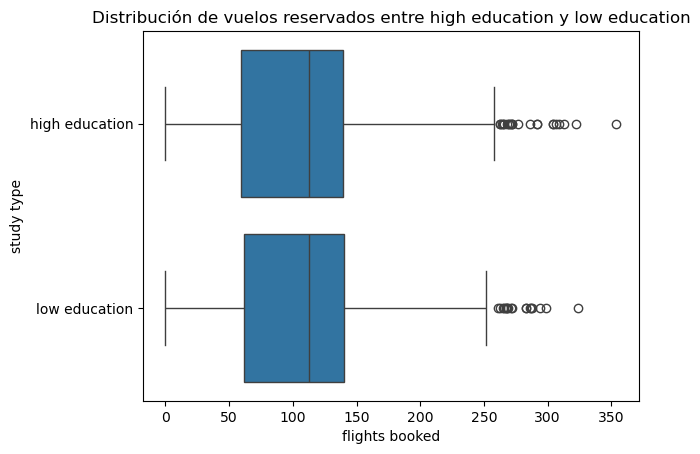

In [99]:
sns.boxplot(x='flights booked', y='study type', data=df_bonus)
plt.title('Distribución de vuelos reservados entre high education y low education');

#para guardar graficas: 

plt.savefig("imagenes/reservas_vuelos_education.jpg", bbox_inches = "tight", pad_inches=0);